In [1]:
import numpy as np
import pandas as pd

In [6]:
from matplotlib import pyplot as plt

In [2]:
train = pd.read_csv("LANL-Earthquake-Prediction/train.csv", nrows=10000000,
                    dtype={'acoustic_data': np.int16, 'time_to_failure': np.float64})
train.head(5)

,acoustic_data,time_to_failure
0,12,1.4691
1,6,1.4691
2,8,1.4691
3,5,1.4691
4,8,1.4691


In [3]:
train.rename({"acoustic_data": "signal", "time_to_failure": "quaketime"}, axis="columns", inplace=True)
train.head(5)

,signal,quaketime
0,12,1.4691
1,6,1.4691
2,8,1.4691
3,5,1.4691
4,8,1.4691


In [4]:
for n in range(5):
    print(train.quaketime.values[n])

1.4690999832
1.4690999821000001
1.4690999809999998
1.4690999799000002
1.4690999787999999


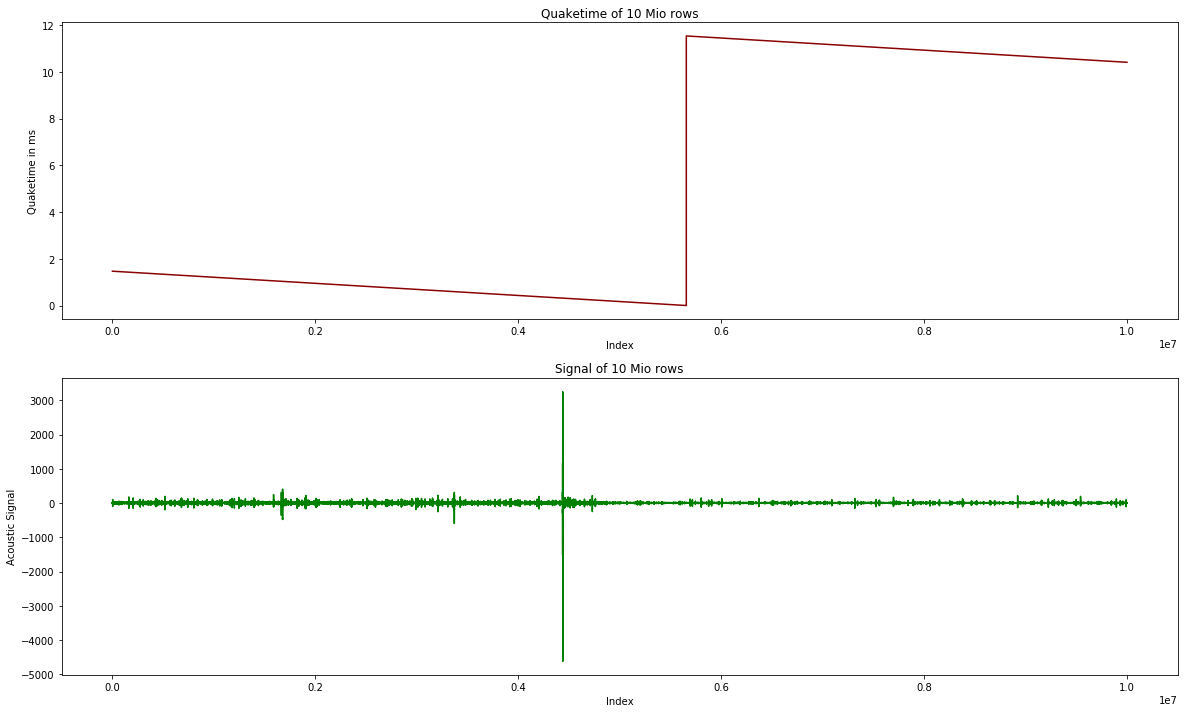

In [8]:
fig, ax = plt.subplots(2,1, figsize=(20,12))
ax[0].plot(train.index.values, train.quaketime.values, c="darkred")
ax[0].set_title("Quaketime of 10 Mio rows")
ax[0].set_xlabel("Index")
ax[0].set_ylabel("Quaketime in ms");
ax[1].plot(train.index.values, train.signal.values, c="green")
ax[1].set_title("Signal of 10 Mio rows")
ax[1].set_xlabel("Index")
ax[1].set_ylabel("Acoustic Signal");

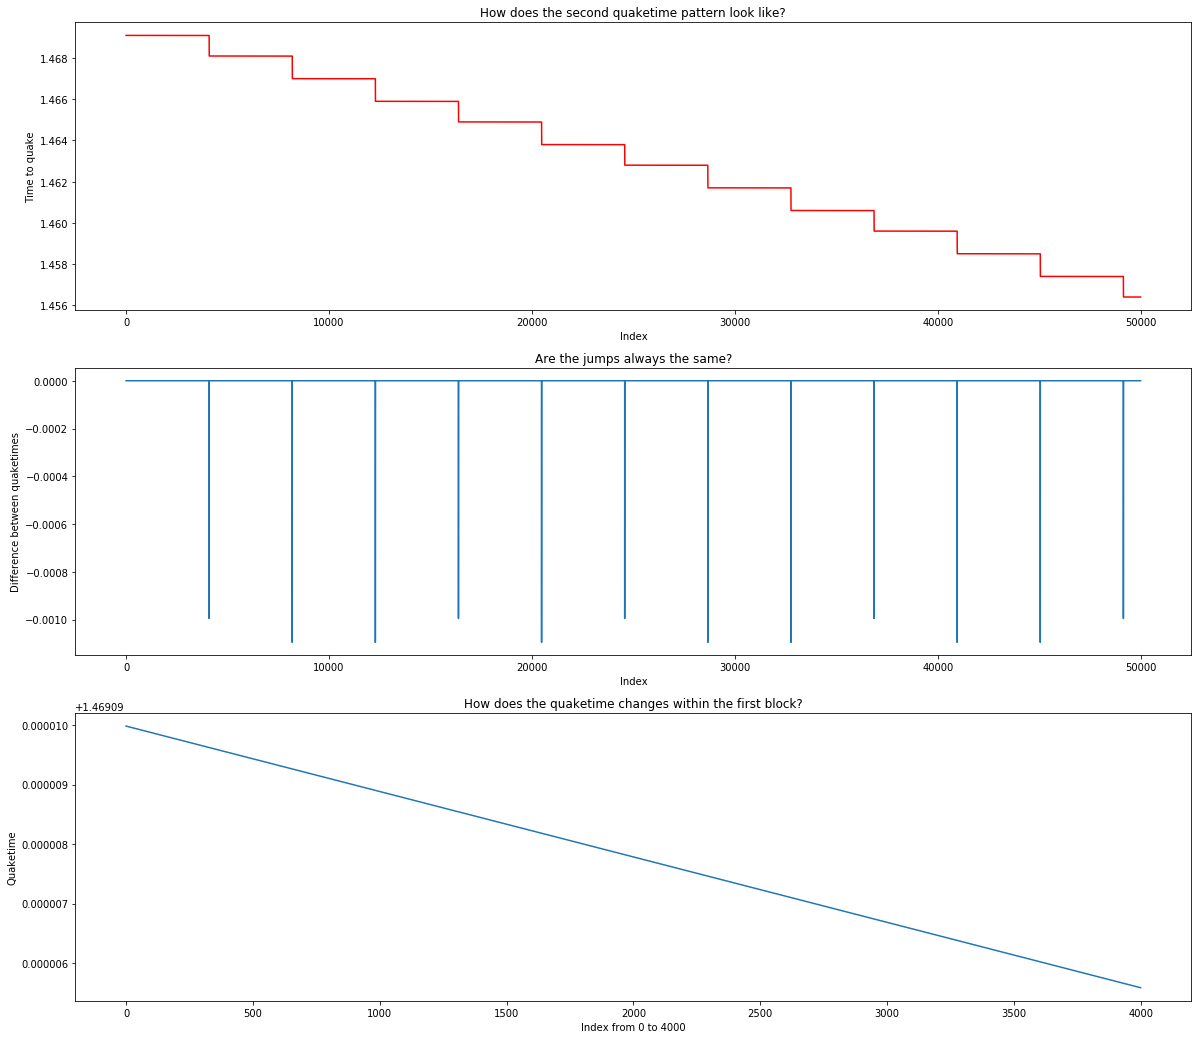

In [9]:
fig, ax = plt.subplots(3,1,figsize=(20,18))
ax[0].plot(train.index.values[0:50000], train.quaketime.values[0:50000], c="Red")
ax[0].set_xlabel("Index")
ax[0].set_ylabel("Time to quake")
ax[0].set_title("How does the second quaketime pattern look like?")
ax[1].plot(train.index.values[0:49999], np.diff(train.quaketime.values[0:50000]))
ax[1].set_xlabel("Index")
ax[1].set_ylabel("Difference between quaketimes")
ax[1].set_title("Are the jumps always the same?")
ax[2].plot(train.index.values[0:4000], train.quaketime.values[0:4000])
ax[2].set_xlabel("Index from 0 to 4000")
ax[2].set_ylabel("Quaketime")
ax[2].set_title("How does the quaketime changes within the first block?");

In [13]:
import os

In [14]:
test_files = os.listdir("LANL-Earthquake-Prediction/test")

In [15]:
test_files[0:5]

['seg_51f0a2.csv',
 'seg_de98fa.csv',
 'seg_ad82ca.csv',
 'seg_e3ca24.csv',
 'seg_64f8dc.csv']

In [16]:
len(test_files)

2624

In [17]:
train.describe()

,signal,quaketime
count,1.000000e+07,1.000000e+07
mean,4.502072e+00,5.183598e+00
std,1.780707e+01,5.091286e+00
min,-4.621000e+03,7.954798e-04
25%,2.000000e+00,6.498971e-01
50%,4.000000e+00,1.298899e+00
75%,7.000000e+00,1.089170e+01
max,3.252000e+03,1.154080e+01


In [21]:
import seaborn as sns

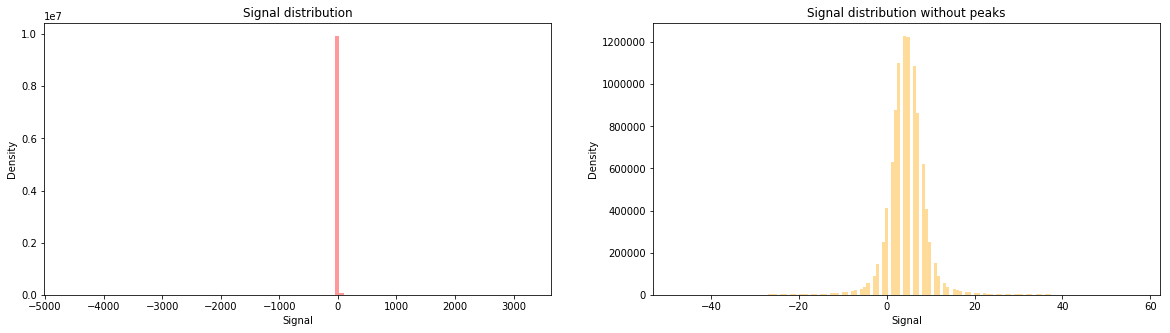

In [22]:
fig, ax = plt.subplots(1,2, figsize=(20,5))
sns.distplot(train.signal.values, ax=ax[0], color="Red", bins=100, kde=False)
ax[0].set_xlabel("Signal")
ax[0].set_ylabel("Density")
ax[0].set_title("Signal distribution")

low = train.signal.mean() - 3 * train.signal.std()
high = train.signal.mean() + 3 * train.signal.std() 
sns.distplot(train.loc[(train.signal >= low) & (train.signal <= high), "signal"].values,
             ax=ax[1],
             color="Orange",
             bins=150, kde=False)
ax[1].set_xlabel("Signal")
ax[1].set_ylabel("Density")
ax[1].set_title("Signal distribution without peaks");

In [25]:
window_sizes = [10, 20, 50, 100, 1000]
for window in window_sizes:
    train["rolling_mean_" + str(window)] = train.signal.rolling(window=window).mean()
    train["rolling_std_" + str(window)] = train.signal.rolling(window=window).std()

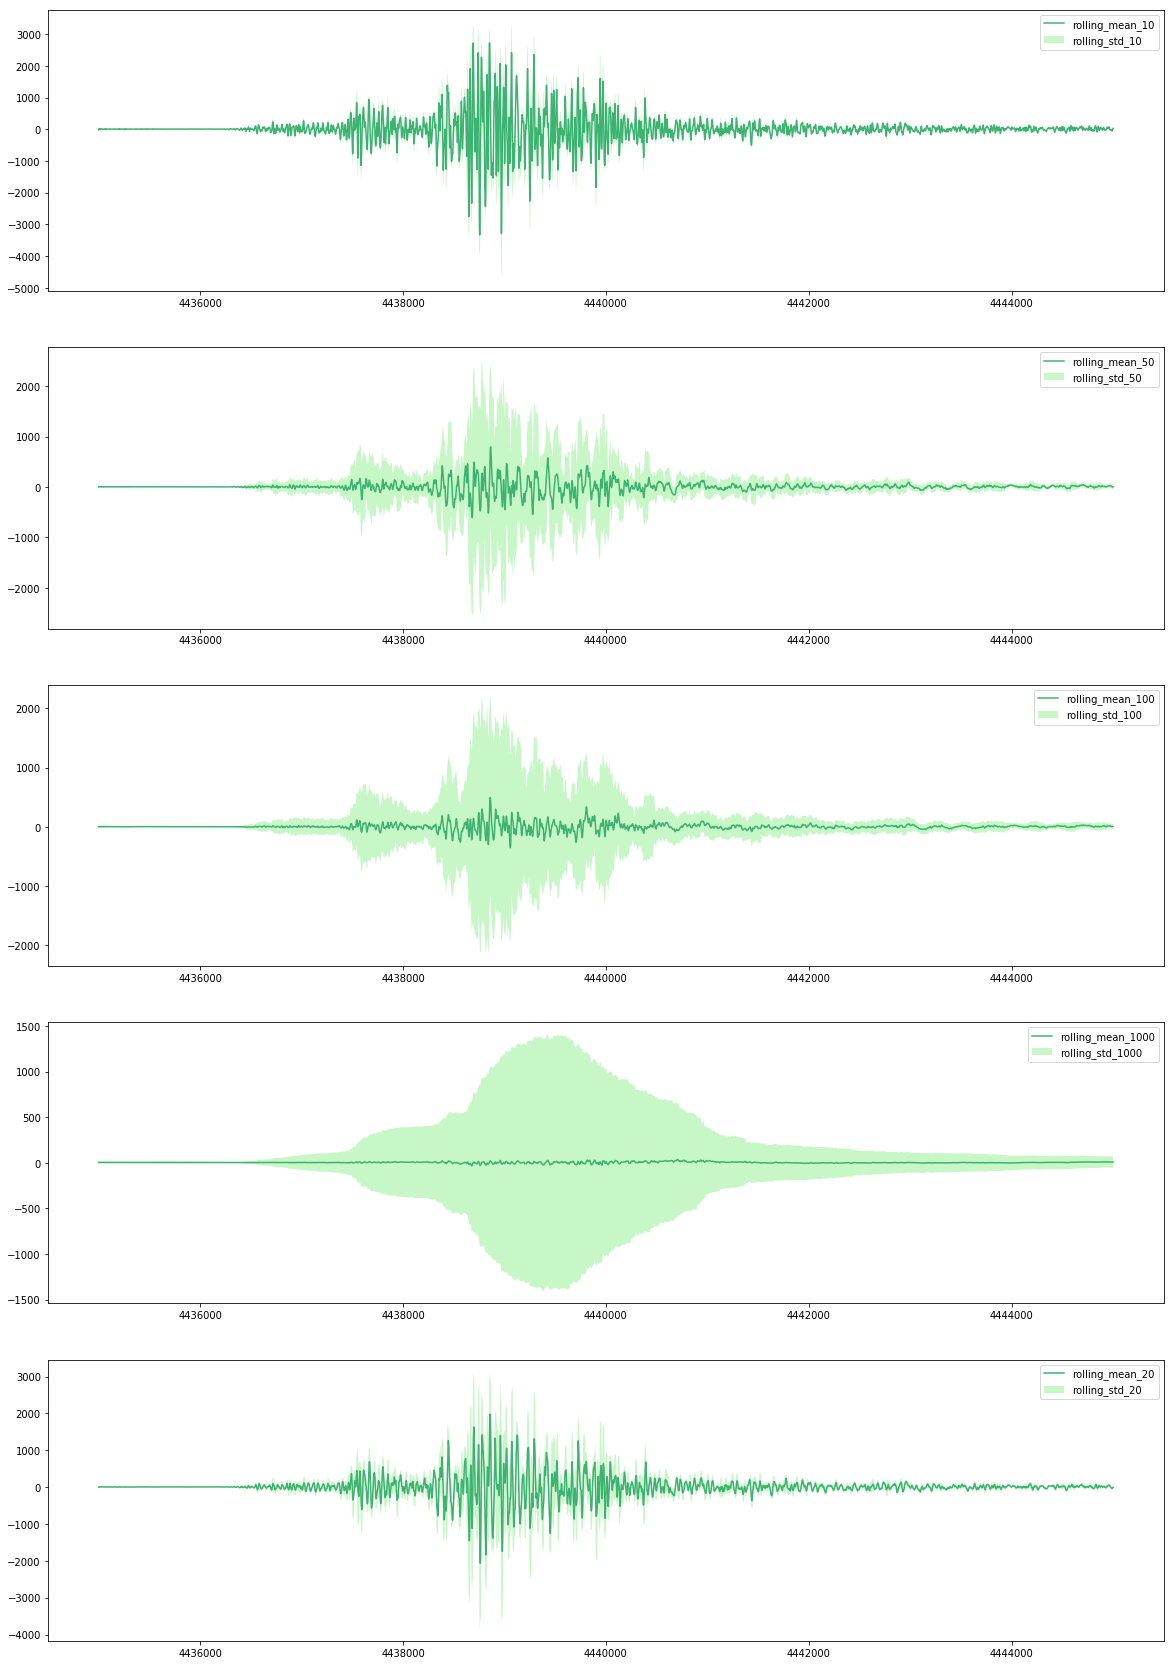

In [26]:
fig, ax = plt.subplots(len(window_sizes),1,figsize=(20,6*len(window_sizes)))

n = 0
for col in train.columns.values:
    if "rolling_" in col:
        if "mean" in col:
            mean_df = train.iloc[4435000:4445000][col]
            ax[n].plot(mean_df, label=col, color="mediumseagreen")
        if "std" in col:
            std = train.iloc[4435000:4445000][col].values
            ax[n].fill_between(mean_df.index.values,
                               mean_df.values-std, mean_df.values+std,
                               facecolor='lightgreen',
                               alpha = 0.5, label=col)
            ax[n].legend()
            n+=1

In [27]:
peaks = train[train.signal.abs() > 500]

In [31]:
peaks.head()

,signal,quaketime,rolling_mean_10,rolling_std_10,rolling_mean_50,rolling_std_50,rolling_mean_100,rolling_std_100,rolling_mean_1000,rolling_std_1000,rolling_mean_20,rolling_std_20
3369905,-565,0.594497,-44.6,333.015582,6.76,228.847294,-2.49,210.902749,4.139,93.920811,-94.20,256.110913
3369906,-595,0.594497,-128.5,357.048472,-0.50,241.958695,-4.91,216.285030,3.539,95.812758,-121.05,279.222129
3369907,-561,0.594497,-214.3,346.368798,-6.78,252.339364,-6.69,220.126442,2.973,97.461711,-141.35,296.070453
4437477,501,0.316798,17.3,303.220510,-31.12,271.007767,-23.62,240.610998,0.800,136.209747,-56.95,267.371115
4437478,586,0.316798,112.3,318.898120,-21.68,284.071595,-13.95,245.485229,1.398,137.460449,-37.95,298.706065


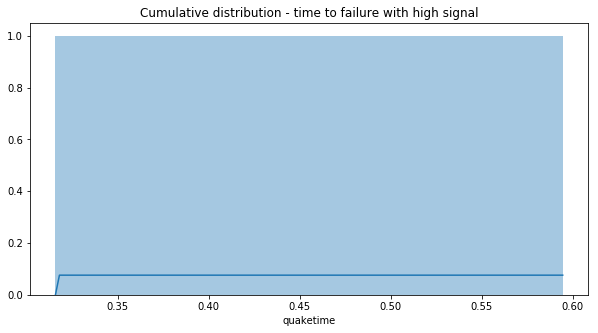

In [32]:
plt.figure(figsize=(10,5))
plt.title("Cumulative distribution - time to failure with high signal")
ax = sns.distplot(peaks.quaketime, hist_kws=dict(cumulative=True), kde_kws=dict(cumulative=True))